# Introduction: 

We are living in a critical era as the number of the new COVID_19 cases and death due to COVID-19 is increasing worldwide and in the US. Mask wearing as part of the social distancing measures is recommended as a preventative action to subside the spread of this virus. However, tweleve states have very limited mask wearing requirements and one state (South Dacota) has absolutely no requirement. In this project I am trying to evaluate the effect of mask policy on COVID-19 burden. To do so I will focus on the data from two neighbor states (Georgia and Alabama) with different mask wearing policies to minimize the effect of confounding factors (e.g. weather, demographics).

# Background and Related Work:

Coronavirus disease 2019 (COVID-19) is caused by a novel coronavirus. It results in severe [acute respiratory syndrome coronavirus 2](https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/about-epidemiology/identifying-source-outbreak.html) (1). This was first identified amid an outbreak of respiratory illness cases in Wuhan City, Hubei Province, China (1).Up until now COVID-19 cases is approximately [73 million worldwide including 16 million in the united states](https://coronavirus.jhu.edu/map.html) (2). Per a WHO report by November 8th, [new cases has increased by 8%, compared to the previous week while new deaths have increased by 21%](https://www.who.int/publications/m/item/weekly-epidemiological-update---10-november-2020) (3). The global and the US death toll due to COVID-19 by Deccember 15th have been [1,624,819 and 300,723](https://coronavirus.jhu.edu/map.html) respectively (2). 

Mask wearing as part of the social distancing policies have been suggested as [one of the most effective prevention measures](https://www.cdc.gov/coronavirus/2019-ncov/prevent-getting-sick/cloth-face-cover-guidance.html) to prevent spreading this virus (4). However, [12 states in the US have very limited mask wearing policies and one states (South Dakota) has no policy around wearing a mask](https://masks4all.co/what-states-require-masks/) (5). In this project I am trying to understand the impact of the mask wearing policy on new daily cases and death of COVID-19. I chose Georgia and Alabama to investigate the mask wearing policies. Georgia never passed any policy to mandate mask wearing while Alabama mandated mask wearing from July 17th (5). These two states are neighbors which helps to control for the differences in weather in addition to other factors such as ethnicity, education that are very similar for [Georgia](https://www.census.gov/quickfacts/GA) and [Alabama](https://www.census.gov/quickfacts/AL) (6,7). Per CDC [minorities are at higher risk of COVID-19](https://www.cdc.gov/coronavirus/2019-ncov/community/health-equity/race-ethnicity.html) and thus it is important to make the comparison of mask mandating policies between states that are similar/close in ethnicity distribution (8).  In this work I am trying to evaluate the effectiveness of the mask policy on new cases and death toll. 

# Research Question and Hypothesis:

1- What is the trend of new cases from July 17th to November 11th for Georgia and for Alamaba
Hypothesis: The hypothesis is that we will see the steeper line for Georgia compared to Alabama since Georgia does not have any mask policy but Alabama had the policy in place since July 17th.


2- Is the accumulative number of the new cases more in Georgia compared to Alabama from July 17th to November 11th 
Hypothesis: The accumulative number of cases are significantly higher in Georgia compared to Alabama

3- Is the accumulative number of the death more in Georgia compared to Alabama from July 17th to November 11th 
Hypothesis: The accumulative number of death are significantly higher in Georgia compared to Alabama

# Methodology: 

## Dataset:

The "United States COVID-19 Cases and Deaths by State over Time" dataset provides detail daily data on the cases and death of COVID-19 for all the states from January to November 11th 2020:

URL: https://healthdata.gov/dataset/united-states-covid-19-cases-and-deaths-state-over-time

All the data in this dataset is unidentified and there is no way to track back this information. This data is available through a government website. The source should be acknowledged when this data is used for analysis. 

## Source:

https://healthdata.gov/harvest_source/datacdcgov

## License:

http://opendefinition.org/licenses/odc-odbl/

## Statistical Analysis:

All the analysis will be done for July 17th (the day mask wearing policy got effective in Alabama) to November 11th. The number of new cases and new deaths will be normalized to the population in each state and all the statisitics and models will run on the normalized data. Descriptive statistics for the two states for new cases and deaths will be provided from July 17th to November 11th. Time series graph from July 17th to November 11th for Georgia and Alabama to compare the trend between the two states. Repeated measurs ANOVA test will be used to compare the numner of daily new cases and new deaths between the two states. 

# Findings:

# Discussion:

# 


# References:

1- Center for Disease Control Prevention: https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/about-epidemiology/identifying-source-outbreak.html

2- John Hopkins University. Corona Virus Resource Center: https://coronavirus.jhu.edu/map.html

3- WHO: https://www.who.int/publications/m/item/weekly-epidemiological-update---10-november-2020

4- Center for Disease Control Prevention: https://www.cdc.gov/coronavirus/2019-ncov/prevent-getting-sick/cloth-face-cover-guidance.html

5- https://masks4all.co/what-states-require-masks/

6- https://www.census.gov/quickfacts/GA

7- https://www.census.gov/quickfacts/AL

8- https://www.cdc.gov/coronavirus/2019-ncov/community/health-equity/race-ethnicity.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import pingouin as pg

$\large\text{Step 1: Select the dataset and perform analysis}$<br>

In [2]:
covid_data=  pd.read_csv('/Users/sdibay/Downloads/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

Drop all states except Georgia and Alabama

In [3]:
covid_data_subset = covid_data[(covid_data.state == 'AL')|(covid_data.state == 'GA')]

In [4]:
#changing the submission date to date type
covid_data_subset['submission_date']= pd.to_datetime(covid_data_subset['submission_date'])

<ipython-input-4-c167b098e8ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_subset['submission_date']= pd.to_datetime(covid_data_subset['submission_date'])


In [5]:
#drop rows with date July 17th since this is the date that law in Alabama so we compare cases after this date
res= covid_data_subset[covid_data_subset["submission_date"] > '2020-07-17'] 
res= covid_data_subset[covid_data_subset["new_death"] > 0] 
res= covid_data_subset[covid_data_subset["new_case"] > 0] 

In [6]:
# reseting indexes
res= res.reset_index(drop=True)

In [7]:
# creating a column to calculate new cases per 1000 
res['new_case_per1000000'] = ""
res['new_death_per1000000'] = ""
for i in range(len(res)):
    #if (res.iloc[[i], [res.columns.get_loc("state")]]=='AL').bool():
    if (res.at[i,'state']=='AL'):
        res.at[i,'new_case_per1000000'] =  res.at[i,'new_case']/4903000.0*1000000.0
        res.at[i,'new_death_per1000000'] =  res.at[i,'new_death']/4903000.0*1000000.0
    if (res.at[i,'state']=='GA'):
        res.at[i,'new_case_per1000000'] =  res.at[i,'new_case']/10620000.0*1000000.0 
        res.at[i,'new_death_per1000000'] =  res.at[i,'new_death']/10620000.0*1000000.0

In [8]:
res['new_case_per1000000']=pd.to_numeric(res['new_case_per1000000'])
res['new_death_per1000000']=pd.to_numeric(res['new_death_per1000000'])

In [23]:
res= res[res["new_case_per1000000"] > 0] 
res= res[res["new_death_per1000000"] > 0] 

In [9]:
#res.to_csv('/Users/sdibay/Desktop/practice.cvs' , sep=',')

In [10]:
#new= pd.read_csv('/Users/sdibay/Desktop/practice.cvs')

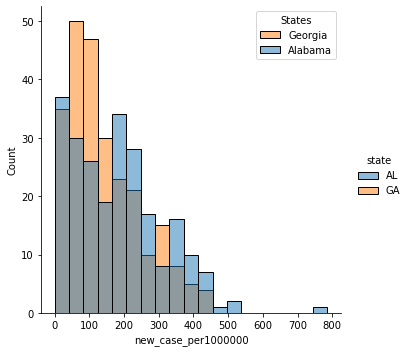

In [11]:
#plotting the distribution of new cases for two states
sns.displot(res, x="new_case_per1000000", hue="state")
plt.legend(title='States', loc='upper right', labels=['Georgia', 'Alabama'])



In [12]:
#sns.displot(res, x="new_case_per1000", hue="state")
#plt.legend(title='States', loc='upper right', labels=['Georgia', 'Alabama'])

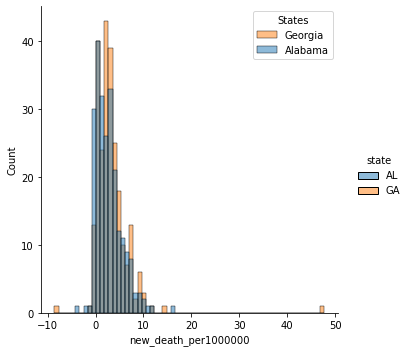

In [13]:
#plotting the distribution of new death for two states
sns.displot(res, x="new_death_per1000000", hue="state")
plt.legend(title='States', loc='upper right', labels=['Georgia', 'Alabama'])

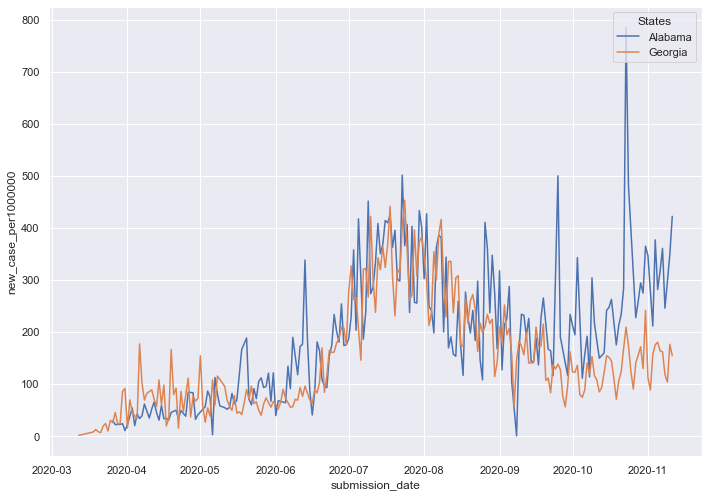

In [25]:
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=0.25, rc={"lines.linewidth": 2.5})
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load an example dataset with long-form data
# Plot the responses for different events and regions
sns.lineplot(x="submission_date", y="new_case_per1000000",
             hue="state",
             data=res)
plt.legend(title='States', loc='upper right', labels=['Alabama', 'Georgia'])

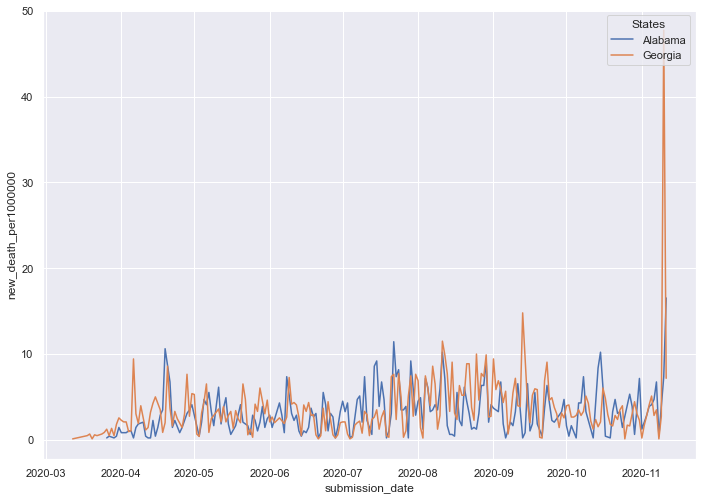

In [24]:
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=0.25, rc={"lines.linewidth": 2.5})
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Load an example dataset with long-form data
# Plot the responses for different events and regions
sns.lineplot(x="submission_date", y="new_death_per1000000",
             hue="state",
             data=res)
plt.legend(title='States', loc='upper right', labels=['Alabama', 'Georgia'])

In [26]:
res.groupby('state')['new_case_per1000000'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AL,203.0,195.488034,129.283774,0.407914,85.559861,183.561085,274.627779,785.641444
GA,233.0,151.548621,102.636713,1.318267,70.809793,124.105461,209.510358,453.201507


In [27]:
res.groupby('state')['new_death_per1000000'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AL,203.0,3.214077,2.620704,0.203957,1.223741,2.855395,4.385070,16.520498
GA,233.0,3.583004,3.850477,0.094162,1.600753,2.824859,4.613936,47.740113


In [ ]:
# Compute the two-way mixed-design ANOVA
res.anova(dv="new_case", between=['state']).round(3)

In [ ]:
new.anova(dv="new_case_per1000", between=['state']).round(3)


In [ ]:
res.anova(dv="new_death", between=['state']).round(3)

In [ ]:
new.anova(dv="new_death_per1000", between=['state']).round(3)

In [ ]:
dfpivitod= df.pivot(index='submission_date', columns='state', values='new_case_per1000')
respivitod_newcase_per1000 = dfpivitod.replace({0:np.nan})
respivitod_newcase_per1000.plot(kind='line', figsize=(12,8), title="Monthly Page Views on English Wikipedia (x 10,000,000,000)")


In [ ]:
# sum up the deat from july to november to do the t-test
new_death_AL= covid_data_subset.loc[covid_data_subset['state'] == 'AL', 'new_death'].sum()
# sum up the death cases from july to november to do the t-test
new_death_GA= covid_data_subset.loc[covid_data_subset['state'] == 'GA', 'new_death'].sum()

In [ ]:
new_death_AL

In [ ]:
new_death_GA

In [ ]:
#start the t-test for new case
from scipy import stats

In [ ]:
#t-test for new cases
#T-test with different means, variance, and n:
stats.ttest_ind(covid_data_subset.loc[covid_data_subset['state'] == 'AL', 'new_case'], covid_data_subset.loc[covid_data_subset['state'] == 'GA', 'new_case'])

In [ ]:
#t-test for new death
#T-test with different means, variance, and n:
stats.ttest_ind(covid_data_subset.loc[covid_data_subset['state'] == 'AL', 'new_death'], covid_data_subset.loc[covid_data_subset['state'] == 'GA', 'new_death'])

In [ ]:
# mixed mode: outcome is new_case, exposure is policy, random effect is state

In [ ]:
md = smf.mixedlm("new_case ~ policy", covid_data_subset, groups=covid_data_subset["state"])

mdf = md.fit()
print(mdf.summary())

In [ ]:
#random intercept for each state
md = smf.mixedlm("new_case ~state", res, groups=res["time"]).fit
md.summary()

In [ ]:
anova_lm(md)

In [ ]:
sns.displot(covid_data_subset['new_case'],  kde=False, label='GA')

In [ ]:
sns.distplot(covid_data_subset['new_case'],  kde=False,label='AL')


In [ ]:
data = sm.datasets.get_rdataset('dietox', 'geepack').data

In [ ]:
data


In [ ]:
pd.api.types.is_categorical_dtype(data.Time)

In [ ]:

data = sm.datasets.get_rdataset('dietox', 'geepack').data
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

In [ ]:
data

In [ ]:
print(type(data['Time']))

In [ ]:
from statsmodels.stats.anova import AnovaRM

In [ ]:
aovrm2way = AnovaRM(df, 'new_case', 'time', within=['group'])
res2way = aovrm2way.fit()

print(res2way)

In [ ]:
sm.stats.anova_lm(model, typ=2)

In [ ]:
respivitod = respivitod.replace({0:np.nan})
respivitod.plot(kind='line', figsize=(12,8), title="Monthly Page Views on English Wikipedia (x 10,000,000,000)")

In [ ]:
respivitod_death = respivitod_death.replace({0:np.nan})
respivitod_death.plot(kind='line', figsize=(12,8), title="Monthly Page Views on English Wikipedia (x 10,000,000,000)")

In [ ]:
respivitod_death= res.pivot(index='submission_date', columns='state', values='new_death')

In [ ]:
# pivoting the dataframe from long to wide to be able to draw longitudinal graphs
respivitod= res.pivot(index='submission_date', columns='state', values='new_case')

In [ ]:
data = pg.read_dataset('rm_anova_wide')

In [ ]:
df = pg.read_dataset('rm_anova')


In [ ]:
res['time'] = res.time.astype('category')

In [ ]:
print(my_model_fit.summary())

In [ ]:
print(sm.stats.anova_lm(my_model_fit, typ=2))

In [ ]:
md